In [1]:
import pandas as pd
ad = pd.read_csv('advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
ad = (ad - ad.mean())/ad.std()
ad.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.319009
1,-1.194379,1.080097,0.667903,-0.895268
2,-1.512360,1.524637,1.779084,-0.592461
3,0.051919,1.214806,1.283185,0.259184
4,0.393196,-0.839507,1.278593,0.524140


In [3]:
# Putting feature variable to X
X = ad[['TV','Radio','Newspaper']]
# Putting response variable to y
y = ad['Sales']

In [4]:
X['intercept'] = 1
X = X.reindex(['intercept','TV','Radio','Newspaper'], axis=1)

In [5]:
X.head()

,intercept,TV,Radio,Newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593


In [6]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [7]:
# Theta needed to be changed with the number of response varaible used.
theta = np.matrix(np.array([0,0,0,0])) 
alpha = 0.01
iterations = 1000

In [8]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [9]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [10]:
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[-9.325873406851316e-18, 0.008967018737358192,...",0.488054
1,"[-1.887379141862766e-17, 0.0178420325875863, 0...",0.478812
2,"[-2.815525590449397e-17, 0.026626000134855474,...",0.469770
3,"[-3.7303493627405256e-17, 0.03531986978687297,...",0.460923
4,"[-4.627409566637652e-17, 0.043924579885335935,...",0.452267
...,...,...
995,"[-5.788591828093111e-16, 0.884604822565373, 0....",0.048461
996,"[-5.787703649673411e-16, 0.8846052708861454, 0...",0.048461
997,"[-5.787259560463561e-16, 0.884605714844278, 0....",0.048461
998,"[-5.787370582766024e-16, 0.8846061544823369, 0...",0.048461


In [11]:
print(gradient_descent_multi(X, y, theta, alpha, iterations).values[999])

[array([-5.78731507e-16,  8.84606590e-01,  3.00420301e-01,  1.63040417e-03])
 0.04846087144244533]


<AxesSubplot:xlabel='index'>

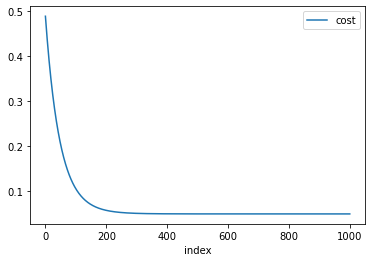

In [12]:
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])

In [13]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

#You don't need to specify an object to save the result because 'lr' will take the results of the fitted model.
lr.fit(X, y)

LinearRegression()

In [14]:
print(lr.intercept_)
print(lr.coef_)

-5.585064192018886e-16
[0.         0.88465106 0.30065466 0.00138348]
